<a href="https://colab.research.google.com/github/JUCSERahull337/PCOS/blob/master/Copy_of_AlexNet_on_PCOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model

# Define image size and batch size
image_size = (224, 224)
batch_size = 32

# Create ImageDataGenerator for data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators for training and validation
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Dataset For PCOS/Data/train',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Dataset For PCOS/Data/train',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Build the AlexNet-like model
input_layer = Input(shape=(image_size[0], image_size[1], 3))
x = Conv2D(96, (11, 11), strides=(4, 4), activation='relu')(input_layer)
x = MaxPooling2D((3, 3), strides=(2, 2))(x)
x = Conv2D(256, (5, 5), activation='relu')(x)
x = MaxPooling2D((3, 3), strides=(2, 2))(x)
x = Conv2D(384, (3, 3), activation='relu')(x)
x = Conv2D(384, (3, 3), activation='relu')(x)
x = Conv2D(256, (3, 3), activation='relu')(x)
x = MaxPooling2D((3, 3), strides=(2, 2))(x)
x = Flatten()(x)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(4096, activation='relu')(x)
output_layer = Dense(2, activation='softmax')(x)  # Two output classes: 'infected' and 'notinfected'

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 10
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs
)

# Evaluate the model on the test dataset
test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Dataset For PCOS/Data/test',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)




Found 1540 images belonging to 2 classes.
Found 384 images belonging to 2 classes.
Epoch 1/10
49/49 [==============================] - 161s 3s/step - loss: 0.4443 - accuracy: 0.7675 - val_loss: 0.4231 - val_accuracy: 0.8411
Epoch 2/10
49/49 [==============================] - 166s 3s/step - loss: 0.0643 - accuracy: 0.9838 - val_loss: 0.1500 - val_accuracy: 0.9714
Epoch 3/10
49/49 [==============================] - 166s 3s/step - loss: 0.0763 - accuracy: 0.9753 - val_loss: 0.0131 - val_accuracy: 0.9948
Epoch 4/10
49/49 [==============================] - 166s 3s/step - loss: 0.0928 - accuracy: 0.9812 - val_loss: 0.5473 - val_accuracy: 0.9583
Epoch 5/10
49/49 [==============================] - 160s 3s/step - loss: 0.0916 - accuracy: 0.9779 - val_loss: 0.1492 - val_accuracy: 0.9792
Epoch 6/10
49/49 [==============================] - 154s 3s/step - loss: 0.0325 - accuracy: 0.9929 - val_loss: 3.2134e-04 - val_accuracy: 1.0000
Epoch 7/10
49/49 [==============================] - 160s 3s/step - 

In [ ]:
model.evaluate(validation_generator)

12/12 [==============================] - 15s 1s/step - loss: 0.0121 - accuracy: 0.9974


[0.012064897455275059, 0.9973958134651184]

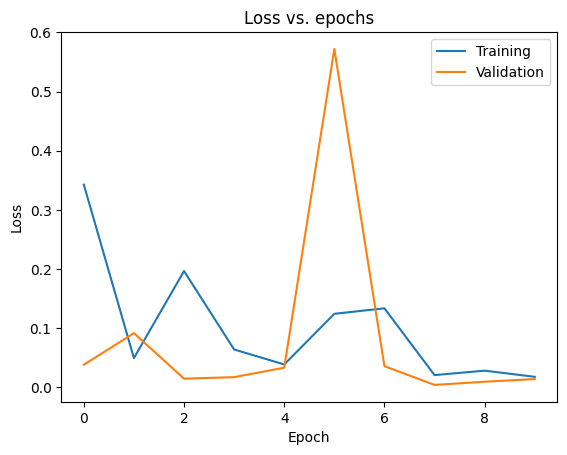

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

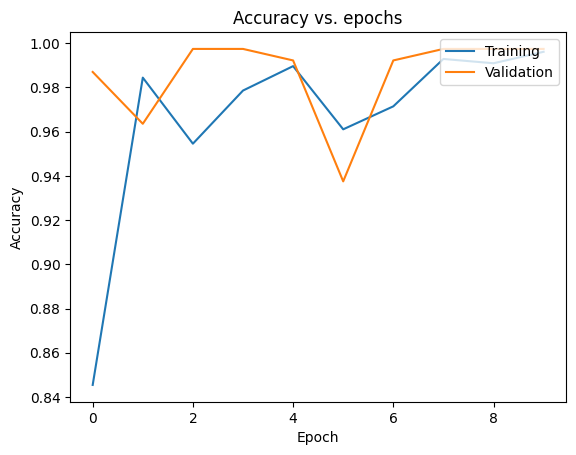

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [ ]:
from tensorflow import keras
model.save('alexnet_pcos_model.h5')
loaded_best_model = keras.models.load_model("/content/alexnet_pcos_model.h5")

In [ ]:
from tensorflow.keras.preprocessing import image

import pickle
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def predict(img_rel_path):
    # Import Image from the path with size of (300, 300)
    img = image.load_img(img_rel_path, target_size=(224, 224))

    # Convert Image to a numpy array
    img = image.img_to_array(img, dtype=np.uint8)

    # Scaling the Image Array values between 0 and 1
    img = np.array(img)/255.0

    # Plotting the Loaded Image
    plt.title("Loaded Image")
    plt.axis('off')
    plt.imshow(img.squeeze())
    plt.show()

    # Get the Predicted Label for the loaded Image
    p = loaded_best_model.predict(img[np.newaxis, ...])

    # Label array
    labels = {0: 'notinfected', 1: 'infected'}

    print("\n\nMaximum Probability: ", np.max(p[0], axis=-1))
    predicted_class = labels[np.argmax(p[0], axis=-1)]
    print("Classified:", predicted_class, "\n\n")

    classes=[]
    prob=[]
    print("\n-------------------Individual Probability--------------------------------\n")

    for i,j in enumerate (p[0],0):
        print(labels[i].upper(),':',round(j*100,2),'%')
        classes.append(labels[i])
        prob.append(round(j*100,2))

    def plot_bar_x():
        # this is for plotting purpose
        index = np.arange(len(classes))
        plt.bar(index, prob)
        plt.xlabel('Labels', fontsize=8)
        plt.ylabel('Probability', fontsize=8)
        plt.xticks(index, classes, fontsize=8, rotation=20)
        plt.title('Probability for loaded image')
        plt.show()
    plot_bar_x()

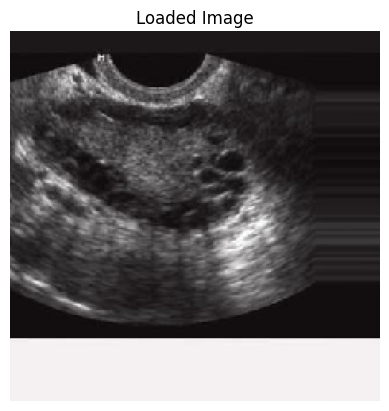

1/1 [==============================] - 0s 140ms/step


Maximum Probability:  0.55192626
Classified: infected 



-------------------Individual Probability--------------------------------

NOTINFECTED : 44.81 %
INFECTED : 55.19 %


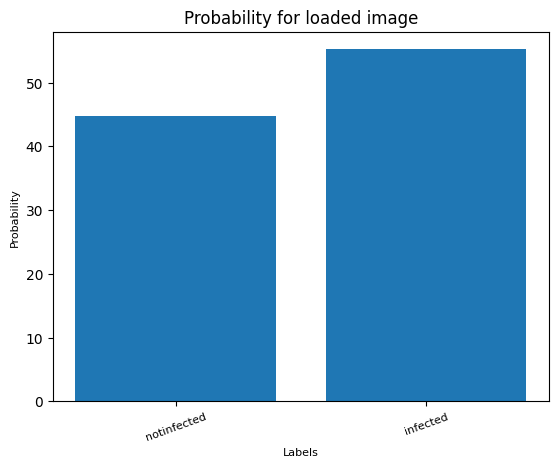

In [ ]:
predict("/content/drive/MyDrive/Dataset For PCOS/Data/test/infected/infected (107).jpg")